In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler,PowerTransformer,LabelEncoder
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier

from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,cohen_kappa_score,classification_report, roc_curve, roc_auc_score, confusion_matrix
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error,mean_absolute_percentage_error

from sklearn.model_selection import GridSearchCV

In [2]:
df = pd.read_csv('Loan.csv')
df.head()

,ApplicationDate,Age,AnnualIncome,CreditScore,EmploymentStatus,EducationLevel,Experience,LoanAmount,LoanDuration,MaritalStatus,...,MonthlyIncome,UtilityBillsPaymentHistory,JobTenure,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved,RiskScore
0,2018-01-01,45,39948,617,Employed,Master,22,13152,48,Married,...,3329.000000,0.724972,11,126928,0.199652,0.227590,419.805992,0.181077,0,49.0
1,2018-01-02,38,39709,628,Employed,Associate,15,26045,48,Single,...,3309.083333,0.935132,3,43609,0.207045,0.201077,794.054238,0.389852,0,52.0
2,2018-01-03,47,40724,570,Employed,Bachelor,26,17627,36,Married,...,3393.666667,0.872241,6,5205,0.217627,0.212548,666.406688,0.462157,0,52.0
3,2018-01-04,58,69084,545,Employed,High School,34,37898,96,Single,...,5757.000000,0.896155,5,99452,0.300398,0.300911,1047.506980,0.313098,0,54.0
4,2018-01-05,37,103264,594,Employed,Associate,17,9184,36,Married,...,8605.333333,0.941369,5,227019,0.197184,0.175990,330.179140,0.070210,1,36.0


In [3]:
df.shape

(20000, 36)

In [4]:
df.size

720000

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ApplicationDate             20000 non-null  object 
 1   Age                         20000 non-null  int64  
 2   AnnualIncome                20000 non-null  int64  
 3   CreditScore                 20000 non-null  int64  
 4   EmploymentStatus            20000 non-null  object 
 5   EducationLevel              20000 non-null  object 
 6   Experience                  20000 non-null  int64  
 7   LoanAmount                  20000 non-null  int64  
 8   LoanDuration                20000 non-null  int64  
 9   MaritalStatus               20000 non-null  object 
 10  NumberOfDependents          20000 non-null  int64  
 11  HomeOwnershipStatus         20000 non-null  object 
 12  MonthlyDebtPayments         20000 non-null  int64  
 13  CreditCardUtilizationRate   200

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,20000.0,39.752600,11.622713,18.000000,32.000000,40.000000,48.000000,8.000000e+01
AnnualIncome,20000.0,59161.473550,40350.845168,15000.000000,31679.000000,48566.000000,74391.000000,4.853410e+05
CreditScore,20000.0,571.612400,50.997358,343.000000,540.000000,578.000000,609.000000,7.120000e+02
Experience,20000.0,17.522750,11.316836,0.000000,9.000000,17.000000,25.000000,6.100000e+01
LoanAmount,20000.0,24882.867800,13427.421217,3674.000000,15575.000000,21914.500000,30835.000000,1.847320e+05
LoanDuration,20000.0,54.057000,24.664857,12.000000,36.000000,48.000000,72.000000,1.200000e+02
NumberOfDependents,20000.0,1.517300,1.386325,0.000000,0.000000,1.000000,2.000000,5.000000e+00
MonthlyDebtPayments,20000.0,454.292700,240.507609,50.000000,286.000000,402.000000,564.000000,2.919000e+03
CreditCardUtilizationRate,20000.0,0.286381,0.159793,0.000974,0.160794,0.266673,0.390634,9.173801e-01
NumberOfOpenCreditLines,20000.0,3.023350,1.736161,0.000000,2.000000,3.000000,4.000000,1.300000e+01


In [7]:
df.describe(include='object').T

,count,unique,top,freq
ApplicationDate,20000,20000,2018-01-01,1
EmploymentStatus,20000,3,Employed,17036
EducationLevel,20000,5,Bachelor,6054
MaritalStatus,20000,4,Married,10041
HomeOwnershipStatus,20000,4,Mortgage,7939
LoanPurpose,20000,5,Home,5925


In [8]:
#Checking for duplicate rows
df.duplicated().sum()

0

In [9]:
#Checking for presence of null values
df.isna().sum()

ApplicationDate               0
Age                           0
AnnualIncome                  0
CreditScore                   0
EmploymentStatus              0
EducationLevel                0
Experience                    0
LoanAmount                    0
LoanDuration                  0
MaritalStatus                 0
NumberOfDependents            0
HomeOwnershipStatus           0
MonthlyDebtPayments           0
CreditCardUtilizationRate     0
NumberOfOpenCreditLines       0
NumberOfCreditInquiries       0
DebtToIncomeRatio             0
BankruptcyHistory             0
LoanPurpose                   0
PreviousLoanDefaults          0
PaymentHistory                0
LengthOfCreditHistory         0
SavingsAccountBalance         0
CheckingAccountBalance        0
TotalAssets                   0
TotalLiabilities              0
MonthlyIncome                 0
UtilityBillsPaymentHistory    0
JobTenure                     0
NetWorth                      0
BaseInterestRate              0
Interest

In [10]:
#Datatype conversion
datatype=[]
unique_count=[]


for i in df.columns:
    datatype.append(df[i].dtype)
    unique_count.append(df[i].nunique())
    
dtype_tbl = pd.DataFrame({'Column':df.columns,'Datatype':datatype,'Number of unique values':unique_count})
dtype_tbl.sort_values('Number of unique values', ascending=True, inplace=True)
dtype_tbl

,Column,Datatype,Number of unique values
17,BankruptcyHistory,int64,2
19,PreviousLoanDefaults,int64,2
34,LoanApproved,int64,2
4,EmploymentStatus,object,3
9,MaritalStatus,object,4
11,HomeOwnershipStatus,object,4
5,EducationLevel,object,5
18,LoanPurpose,object,5
10,NumberOfDependents,int64,6
15,NumberOfCreditInquiries,int64,8


In [11]:
df['BankruptcyHistory'] = df['BankruptcyHistory'].astype('object')
df['PreviousLoanDefaults'] = df['PreviousLoanDefaults'].astype('object')
df['LoanApproved'] = df['LoanApproved'].astype('object')

In [12]:
cat = df.select_dtypes(include='object').columns.to_list()
num = df.select_dtypes(exclude='object').columns.to_list()

In [13]:
#Measures of shape
skewness=[]
kurtosis=[]


for i in num:
    skewness.append(df[i].skew())
    kurtosis.append(df[i].kurt())
    
pd.DataFrame({'Column':num,'Skewness':skewness,'Kurtosis':kurtosis})

,Column,Skewness,Kurtosis
0,Age,0.185964,-0.310585
1,AnnualIncome,2.088948,6.851505
2,CreditScore,-0.596727,0.231691
3,Experience,0.339981,-0.370905
4,LoanAmount,1.833688,6.768544
5,LoanDuration,0.651330,0.167285
6,NumberOfDependents,0.639919,-0.486165
7,MonthlyDebtPayments,1.653435,4.919596
8,CreditCardUtilizationRate,0.601131,-0.086265
9,NumberOfOpenCreditLines,0.599662,0.371324


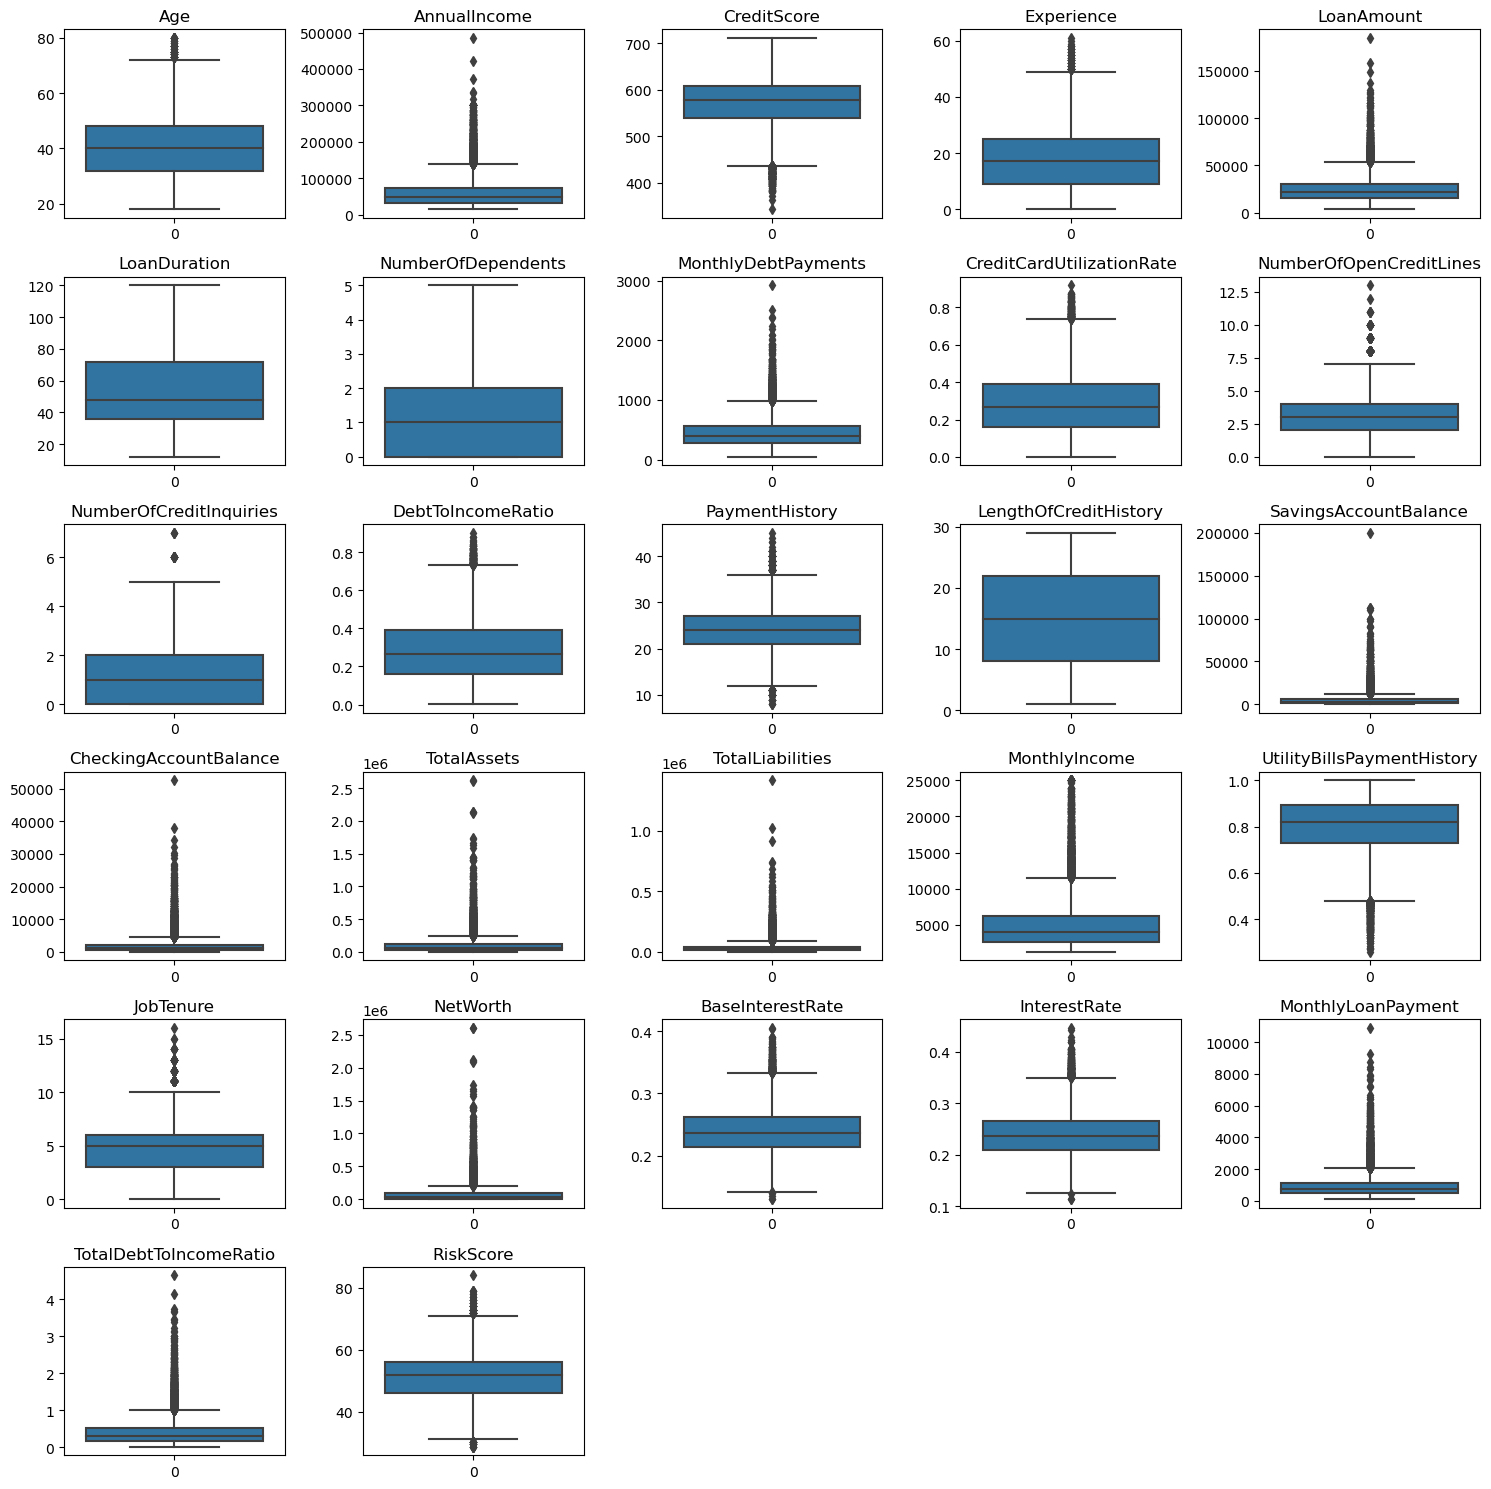

In [14]:
plt.figure(figsize=(15,15))
t = 1
for i in num:
    plt.subplot(6,5,t)
    sns.boxplot(df[i])
    plt.title(i)
    t+=1
plt.tight_layout()
plt.show()

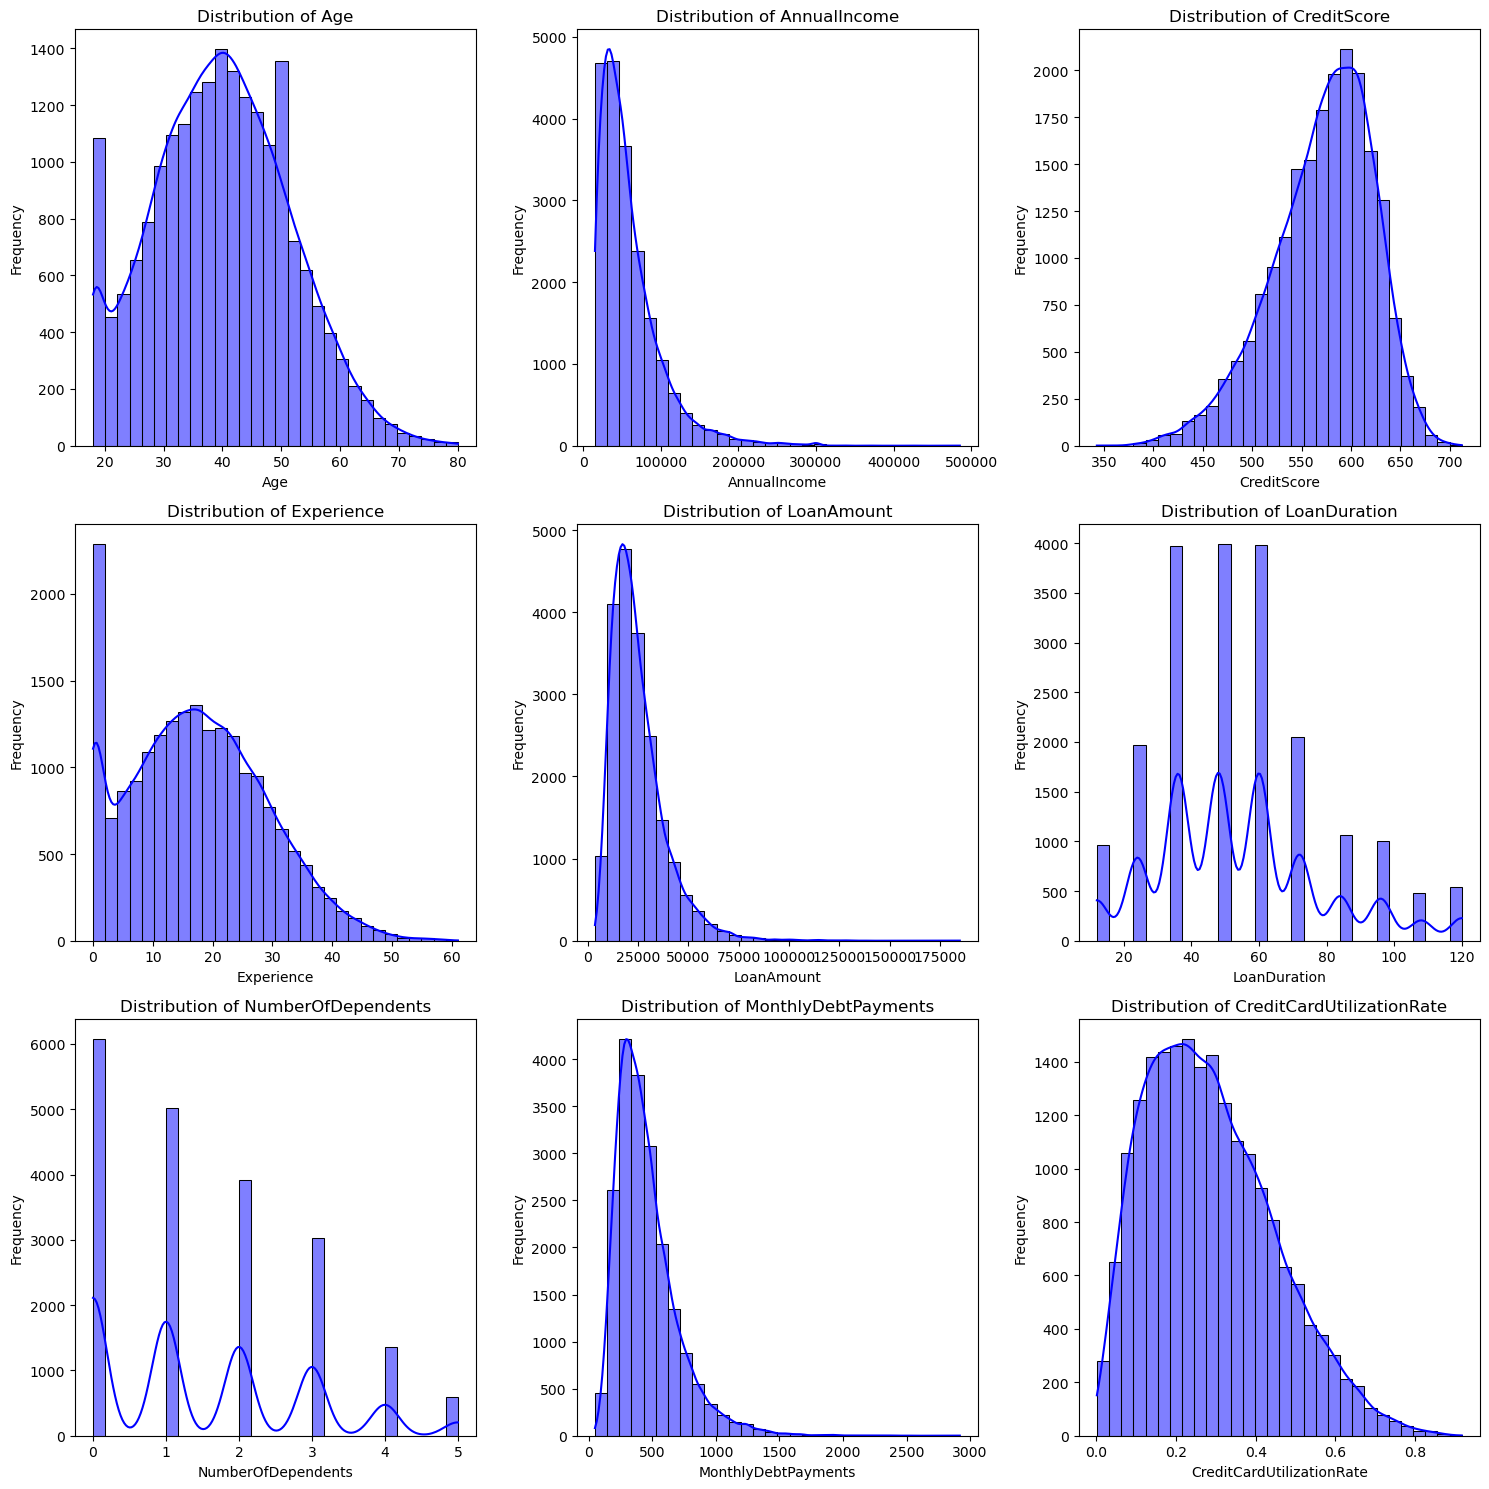

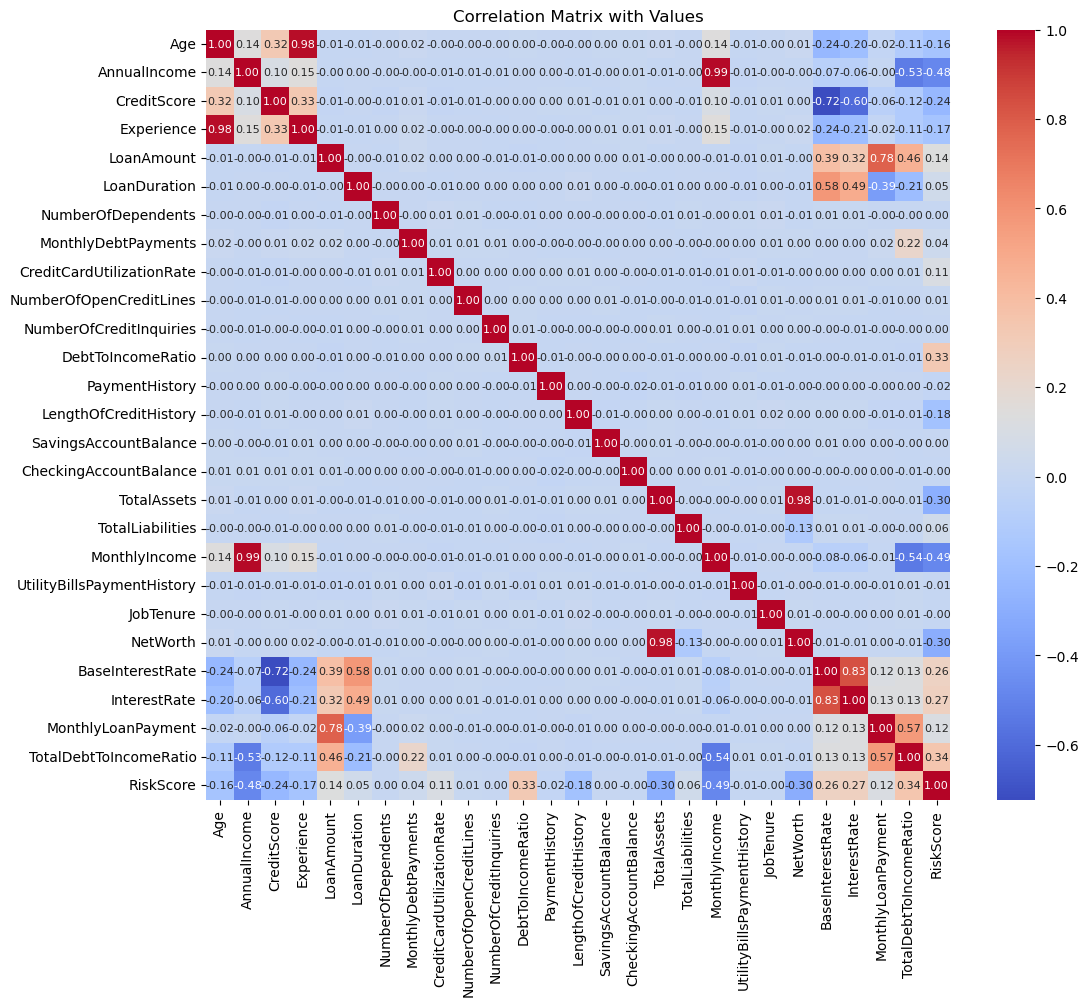

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Selecting numerical columns for analysis
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Plotting distribution graphs for numerical columns
plt.figure(figsize=(15, 15))
for i, column in enumerate(numerical_columns[:9], 1):  # Displaying only first 9 features for simplicity
    plt.subplot(3, 3, i)
    sns.histplot(df[column], kde=True, bins=30, color='blue')
    plt.title(f"Distribution of {column}")
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# Correlation matrix visualization
correlation_matrix = df[numerical_columns].corr()

# Regenerating the correlation matrix heatmap with annotations
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, annot_kws={"size": 8})
plt.title("Correlation Matrix with Values")
plt.show()


In [20]:
#Data Preprocessing
for i in cat:
    print(df[i].value_counts())
    print('-----------------------------')

ApplicationDate
2018-01-01    1
2054-07-01    1
2054-07-08    1
2054-07-07    1
2054-07-06    1
             ..
2036-04-02    1
2036-04-01    1
2036-03-31    1
2036-03-30    1
2072-10-03    1
Name: count, Length: 20000, dtype: int64
-----------------------------
EmploymentStatus
Employed         17036
Self-Employed     1573
Unemployed        1391
Name: count, dtype: int64
-----------------------------
EducationLevel
Bachelor       6054
High School    5908
Associate      4034
Master         3050
Doctorate       954
Name: count, dtype: int64
-----------------------------
MaritalStatus
Married     10041
Single       6078
Divorced     2882
Widowed       999
Name: count, dtype: int64
-----------------------------
HomeOwnershipStatus
Mortgage    7939
Rent        6087
Own         3938
Other       2036
Name: count, dtype: int64
-----------------------------
BankruptcyHistory
0    18952
1     1048
Name: count, dtype: int64
-----------------------------
LoanPurpose
Home                  5925
Deb

In [21]:
# Converting these columns back to numeric datatype
df['BankruptcyHistory'] = df['BankruptcyHistory'].astype('int')
df['PreviousLoanDefaults'] = df['PreviousLoanDefaults'].astype('int')
df['LoanApproved'] = df['LoanApproved'].astype('int')

In [22]:
df['EmploymentStatus'] = df['EmploymentStatus'].replace({"Unemployed": 0, "Self-Employed": 1, "Employed": 2}) # from least to most stable

In [23]:
df['EducationLevel'] = df['EducationLevel'].replace({"High School": 0, "Associate": 1, "Bachelor": 2, "Master": 3, "Doctorate": 4})

In [24]:
l = LabelEncoder()

for i in ['MaritalStatus','HomeOwnershipStatus','LoanPurpose']:
    df[i] = l.fit_transform(df[i])

In [25]:
#Scaling
s = StandardScaler()
for i in num:
    if i!='RiskScore':
        df[i]=s.fit_transform(df[[i]])

In [26]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,20000.0,-1.023182e-16,1.000025,-1.871606,-0.667038,0.021286,0.709611,3.462910
AnnualIncome,20000.0,-4.547474e-17,1.000025,-1.094465,-0.681105,-0.262590,0.377437,10.562113
CreditScore,20000.0,4.000356e-16,1.000025,-4.482940,-0.619899,0.125257,0.733147,2.752909
EmploymentStatus,20000.0,1.782250e+00,0.556283,0.000000,2.000000,2.000000,2.000000,2.000000
EducationLevel,20000.0,1.455400e+00,1.195861,0.000000,0.000000,2.000000,2.000000,4.000000
Experience,20000.0,1.275424e-16,1.000025,-1.548418,-0.753122,-0.046193,0.660736,3.841916
LoanAmount,20000.0,-2.486900e-18,1.000025,-1.579559,-0.693216,-0.221073,0.443293,11.904976
LoanDuration,20000.0,-8.419931e-17,1.000025,-1.705181,-0.732113,-0.245578,0.727490,2.673628
MaritalStatus,20000.0,1.259700e+00,0.761830,0.000000,1.000000,1.000000,2.000000,3.000000
NumberOfDependents,20000.0,-3.943512e-17,1.000025,-1.094504,-1.094504,-0.373154,0.348195,2.512244


In [27]:
skewness=[]
kurtosis=[]


for i in num:
    skewness.append(df[i].skew())
    kurtosis.append(df[i].kurt())
    
pd.DataFrame({'Column':num,'Skewness':skewness,'Kurtosis':kurtosis})

,Column,Skewness,Kurtosis
0,Age,0.185964,-0.310585
1,AnnualIncome,2.088948,6.851505
2,CreditScore,-0.596727,0.231691
3,Experience,0.339981,-0.370905
4,LoanAmount,1.833688,6.768544
5,LoanDuration,0.651330,0.167285
6,NumberOfDependents,0.639919,-0.486165
7,MonthlyDebtPayments,1.653435,4.919596
8,CreditCardUtilizationRate,0.601131,-0.086265
9,NumberOfOpenCreditLines,0.599662,0.371324


In [28]:
p = PowerTransformer(method='yeo-johnson')
for i in num:
    if i not in ['RiskScore','Age','Experience','PaymentHistory','LengthOfCreditHistory','JobTenure','BaseInterestRate','InterestRate']:
        df[i]=p.fit_transform(df[[i]])

In [29]:
skewness=[]
kurtosis=[]


for i in num:
    skewness.append(df[i].skew())
    kurtosis.append(df[i].kurt())
    
pd.DataFrame({'Column':num,'Skewness':skewness,'Kurtosis':kurtosis})

,Column,Skewness,Kurtosis
0,Age,0.185964,-0.310585
1,AnnualIncome,0.126234,-0.734308
2,CreditScore,-0.006931,-0.262117
3,Experience,0.339981,-0.370905
4,LoanAmount,0.066452,-0.453102
5,LoanDuration,0.013768,-0.348507
6,NumberOfDependents,0.129240,-1.193165
7,MonthlyDebtPayments,0.062740,-0.443947
8,CreditCardUtilizationRate,0.055974,-0.711579
9,NumberOfOpenCreditLines,0.028311,-0.343663


In [30]:
x = df.drop(columns=['RiskScore','LoanApproved','ApplicationDate'])
y_reg = df['RiskScore']
y_class = df['LoanApproved']

# Regression
xtrain_r,xtest_r,ytrain_r,ytest_r = train_test_split(x,y_reg,train_size=0.7,random_state=10)

# Classification
xtrain_c,xtest_c,ytrain_c,ytest_c = train_test_split(x,y_class,train_size=0.7,random_state=10)

In [31]:
# Regression Modelling Risk Prediction
mod = []
r2 = []
mse = []
rmse = []
mae = []
mape = []
def reg_model_validation(model,xtrain,ytrain,xtest,ytest):
    m = model
    m.fit(xtrain,ytrain)
    ypred = m.predict(xtest)
    
    
    mod.append(str(model))
    r2.append(r2_score(ytest,ypred))
    mse.append(mean_squared_error(ytest,ypred))
    rmse.append(np.sqrt(mean_squared_error(ytest,ypred)))
    mae.append(mean_absolute_error(ytest,ypred))
    mape.append(mean_absolute_percentage_error(ytest,ypred))
        
    scorecard=pd.DataFrame({'Model':mod,
                            'R2 Score':r2,
                            'Mean Squared Error':mae,
                            'Root Mean Squared Error':rmse,
                            'Mean Absolute Error':mae,
                            'Mean Absolute Percentage Error':mape})
    print('Score Card')
    return scorecard

In [32]:
#Linear Regression
reg_model_validation(LinearRegression(),xtrain_r,ytrain_r,xtest_r,ytest_r)

Score Card


,Model,R2 Score,Mean Squared Error,Root Mean Squared Error,Mean Absolute Error,Mean Absolute Percentage Error
0,LinearRegression(),0.779448,2.988693,3.616398,2.988693,0.061692


In [33]:
#Ridge Regression
reg_model_validation(Ridge(),xtrain_r,ytrain_r,xtest_r,ytest_r)

Score Card


,Model,R2 Score,Mean Squared Error,Root Mean Squared Error,Mean Absolute Error,Mean Absolute Percentage Error
0,LinearRegression(),0.779448,2.988693,3.616398,2.988693,0.061692
1,Ridge(),0.779452,2.988726,3.616368,2.988726,0.061694


In [34]:
#lasso
reg_model_validation(Lasso(),xtrain_r,ytrain_r,xtest_r,ytest_r)

Score Card


,Model,R2 Score,Mean Squared Error,Root Mean Squared Error,Mean Absolute Error,Mean Absolute Percentage Error
0,LinearRegression(),0.779448,2.988693,3.616398,2.988693,0.061692
1,Ridge(),0.779452,2.988726,3.616368,2.988726,0.061694
2,Lasso(),0.449520,4.369403,5.713365,4.369403,0.090111


In [35]:
#Elastic Net
reg_model_validation(ElasticNet(),xtrain_r,ytrain_r,xtest_r,ytest_r)

Score Card


,Model,R2 Score,Mean Squared Error,Root Mean Squared Error,Mean Absolute Error,Mean Absolute Percentage Error
0,LinearRegression(),0.779448,2.988693,3.616398,2.988693,0.061692
1,Ridge(),0.779452,2.988726,3.616368,2.988726,0.061694
2,Lasso(),0.449520,4.369403,5.713365,4.369403,0.090111
3,ElasticNet(),0.477885,4.258690,5.564220,4.258690,0.087694


In [36]:
# Decision Tree Regressor
reg_model_validation(DecisionTreeRegressor(),xtrain_r,ytrain_r,xtest_r,ytest_r)

Score Card


,Model,R2 Score,Mean Squared Error,Root Mean Squared Error,Mean Absolute Error,Mean Absolute Percentage Error
0,LinearRegression(),0.779448,2.988693,3.616398,2.988693,0.061692
1,Ridge(),0.779452,2.988726,3.616368,2.988726,0.061694
2,Lasso(),0.449520,4.369403,5.713365,4.369403,0.090111
3,ElasticNet(),0.477885,4.258690,5.564220,4.258690,0.087694
4,DecisionTreeRegressor(),0.697568,2.363700,4.234823,2.363700,0.049882


In [37]:
# Random Forest Regressor
reg_model_validation(RandomForestRegressor(),xtrain_r,ytrain_r,xtest_r,ytest_r)

Score Card


,Model,R2 Score,Mean Squared Error,Root Mean Squared Error,Mean Absolute Error,Mean Absolute Percentage Error
0,LinearRegression(),0.779448,2.988693,3.616398,2.988693,0.061692
1,Ridge(),0.779452,2.988726,3.616368,2.988726,0.061694
2,Lasso(),0.449520,4.369403,5.713365,4.369403,0.090111
3,ElasticNet(),0.477885,4.258690,5.564220,4.258690,0.087694
4,DecisionTreeRegressor(),0.697568,2.363700,4.234823,2.363700,0.049882
5,RandomForestRegressor(),0.870493,1.707218,2.771197,1.707218,0.036108


In [38]:
#Ada Boost
reg_model_validation(AdaBoostRegressor(),xtrain_r,ytrain_r,xtest_r,ytest_r)

Score Card


,Model,R2 Score,Mean Squared Error,Root Mean Squared Error,Mean Absolute Error,Mean Absolute Percentage Error
0,LinearRegression(),0.779448,2.988693,3.616398,2.988693,0.061692
1,Ridge(),0.779452,2.988726,3.616368,2.988726,0.061694
2,Lasso(),0.449520,4.369403,5.713365,4.369403,0.090111
3,ElasticNet(),0.477885,4.258690,5.564220,4.258690,0.087694
4,DecisionTreeRegressor(),0.697568,2.363700,4.234823,2.363700,0.049882
5,RandomForestRegressor(),0.870493,1.707218,2.771197,1.707218,0.036108
6,AdaBoostRegressor(),0.636942,4.278198,4.639909,4.278198,0.087932


In [39]:
# Gradient Boosting Regressor
reg_model_validation(GradientBoostingRegressor(),xtrain_r,ytrain_r,xtest_r,ytest_r)

Score Card


,Model,R2 Score,Mean Squared Error,Root Mean Squared Error,Mean Absolute Error,Mean Absolute Percentage Error
0,LinearRegression(),0.779448,2.988693,3.616398,2.988693,0.061692
1,Ridge(),0.779452,2.988726,3.616368,2.988726,0.061694
2,Lasso(),0.449520,4.369403,5.713365,4.369403,0.090111
3,ElasticNet(),0.477885,4.258690,5.564220,4.258690,0.087694
4,DecisionTreeRegressor(),0.697568,2.363700,4.234823,2.363700,0.049882
5,RandomForestRegressor(),0.870493,1.707218,2.771197,1.707218,0.036108
6,AdaBoostRegressor(),0.636942,4.278198,4.639909,4.278198,0.087932
7,GradientBoostingRegressor(),0.883651,1.803925,2.626657,1.803925,0.038500


In [40]:
#XGB Regressor
reg_model_validation(XGBRegressor(),xtrain_r,ytrain_r,xtest_r,ytest_r)

Score Card


,Model,R2 Score,Mean Squared Error,Root Mean Squared Error,Mean Absolute Error,Mean Absolute Percentage Error
0,LinearRegression(),0.779448,2.988693,3.616398,2.988693,0.061692
1,Ridge(),0.779452,2.988726,3.616368,2.988726,0.061694
2,Lasso(),0.449520,4.369403,5.713365,4.369403,0.090111
3,ElasticNet(),0.477885,4.258690,5.564220,4.258690,0.087694
4,DecisionTreeRegressor(),0.697568,2.363700,4.234823,2.363700,0.049882
5,RandomForestRegressor(),0.870493,1.707218,2.771197,1.707218,0.036108
6,AdaBoostRegressor(),0.636942,4.278198,4.639909,4.278198,0.087932
7,GradientBoostingRegressor(),0.883651,1.803925,2.626657,1.803925,0.038500
8,"XGBRegressor(base_score=None, booster=None, ca...",0.894738,1.628073,2.498368,1.628073,0.034532


In [41]:
#Final Model Since, XGB regressor model gave better metrics than other models, we'll be tuning it for final prediction.
params = {
    'n_estimators': [100,150, 180, 210],
    'learning_rate': [0.01, 0.05, 0.08, 0.10],
    'max_depth': [2,4,6,8]
}

In [42]:
gscv = GridSearchCV(estimator=XGBRegressor(random_state=2),param_grid=params,scoring='r2',verbose=3)
gscv.fit(xtrain_r,ytrain_r)

Fitting 5 folds for each of 64 candidates, totalling 320 fits
[CV 1/5] END learning_rate=0.01, max_depth=2, n_estimators=100;, score=0.374 total time=   0.0s
[CV 2/5] END learning_rate=0.01, max_depth=2, n_estimators=100;, score=0.371 total time=   0.0s
[CV 3/5] END learning_rate=0.01, max_depth=2, n_estimators=100;, score=0.369 total time=   0.1s
[CV 4/5] END learning_rate=0.01, max_depth=2, n_estimators=100;, score=0.372 total time=   0.0s
[CV 5/5] END learning_rate=0.01, max_depth=2, n_estimators=100;, score=0.374 total time=   0.0s
[CV 1/5] END learning_rate=0.01, max_depth=2, n_estimators=150;, score=0.471 total time=   0.1s
[CV 2/5] END learning_rate=0.01, max_depth=2, n_estimators=150;, score=0.468 total time=   0.1s
[CV 3/5] END learning_rate=0.01, max_depth=2, n_estimators=150;, score=0.464 total time=   0.1s
[CV 4/5] END learning_rate=0.01, max_depth=2, n_estimators=150;, score=0.470 total time=   0.1s
[CV 5/5] END learning_rate=0.01, max_depth=2, n_estimators=150;, score=0.4

GridSearchCV(estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_bi...
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=2, ...),
             param_grid={'learning_rate': [0.01, 0.05, 0.08, 0.1],
                         'max_depth': [2, 4, 6, 8],
                         'n_estimators': [100, 150, 180, 210]},
             scoring='r2', verbose=3)

In [43]:
gscv.best_params_

{'learning_rate': 0.08, 'max_depth': 6, 'n_estimators': 210}

In [44]:
reg_model_validation(XGBRegressor(**gscv.best_params_),xtrain_r,ytrain_r,xtest_r,ytest_r)

Score Card


,Model,R2 Score,Mean Squared Error,Root Mean Squared Error,Mean Absolute Error,Mean Absolute Percentage Error
0,LinearRegression(),0.779448,2.988693,3.616398,2.988693,0.061692
1,Ridge(),0.779452,2.988726,3.616368,2.988726,0.061694
2,Lasso(),0.449520,4.369403,5.713365,4.369403,0.090111
3,ElasticNet(),0.477885,4.258690,5.564220,4.258690,0.087694
4,DecisionTreeRegressor(),0.697568,2.363700,4.234823,2.363700,0.049882
5,RandomForestRegressor(),0.870493,1.707218,2.771197,1.707218,0.036108
6,AdaBoostRegressor(),0.636942,4.278198,4.639909,4.278198,0.087932
7,GradientBoostingRegressor(),0.883651,1.803925,2.626657,1.803925,0.038500
8,"XGBRegressor(base_score=None, booster=None, ca...",0.894738,1.628073,2.498368,1.628073,0.034532
9,"XGBRegressor(base_score=None, booster=None, ca...",0.907219,1.488545,2.345586,1.488545,0.031770


In [45]:
reg_final_model = XGBRegressor(**gscv.best_params_, random_state=2)

reg_final_model.fit(xtrain_r,ytrain_r)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.08, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=6, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=210, n_jobs=None,
             num_parallel_tree=None, random_state=2, ...)

In [46]:
reg_feat_imp= reg_final_model.feature_importances_

fi_tbl = pd.DataFrame({'Column':xtrain_c.columns,'Feature importance':reg_feat_imp})
fi_tbl.sort_values(by='Feature importance', ascending=False)

,Column,Feature importance
16,BankruptcyHistory,0.347386
18,PreviousLoanDefaults,0.135827
25,MonthlyIncome,0.086627
15,DebtToIncomeRatio,0.075809
28,NetWorth,0.073680
32,TotalDebtToIncomeRatio,0.047842
3,EmploymentStatus,0.044146
1,AnnualIncome,0.034313
20,LengthOfCreditHistory,0.033732
30,InterestRate,0.032436


In [47]:
# Model Validation
reg_final_model.predict([[0.500412, 0.952395, -0.810209, 2.000000, 5.000000, 0.850507, 0.035302, -1.900200, 0.000000, 0.180322, 1.000000, 1.750540, 1.120532, 1.950420, 1.025342, 2.800012, 0.000000, 4.000000, 0.000000, -1.800450, 0.300512, 0.350409, 1.150250, 0.610350, 0.500450, 0.550132, 0.105212, -0.001500, 0.700401, -0.390250, -0.450123, 1.500345, 0.050312]
])[0]

51.579124

In [48]:
reg_final_model.predict([[-0.300412, 0.612395, 0.810209, 1.500000, 2.000000, 0.350507, 0.075302, -1.900200, 0.000000, 0.480322, 1.000000, 1.750540, 1.120532, -1.950420, 1.025342, 2.500012, 0.000000, 2.000000, 1.000000, -1.800450, 0.300512, 0.136572, 1.150250, 0.610350, -0.500450, 0.550132, 0.105212, -0.001500, 0.700401, -0.390250, -0.450123, 1.500345, 0.950312]
])[0]

62.58551

In [49]:
#From the above 2 entries, 
#we can see that the first applicant has a risk score of 51.5, whereas the second applicant has a risk score of 62.5.

In [50]:
# Classification Modelling - Loan Approved or not?
mod = []
acc = []
pre = []
rec = []
f1 = []
ck = []
def model_validation(model,xtrain,ytrain,xtest,ytest):
    m = model
    m.fit(xtrain,ytrain)
    hard = m.predict(xtest)
    soft = m.predict_proba(xtest)[:,1]
    
    print('Classification Report\n',classification_report(ytest,hard))
    fpr,tpr,thres = roc_curve(ytest,soft)
    
    print('ROC Curve')
    plt.title(f'ROC AUC Score:{round(roc_auc_score(ytest,soft),3)}')
    plt.plot(fpr,tpr)
    plt.plot([0,1],[0,1],linestyle='--',color='red')
    plt.show()
    
    
    mod.append(str(model))
    acc.append(accuracy_score(ytest,hard))
    pre.append(precision_score(ytest,hard))
    rec.append(recall_score(ytest,hard))
    f1.append(f1_score(ytest,hard))
    ck.append(cohen_kappa_score(ytest,hard))
    scorecard=pd.DataFrame({'Model':mod,
                            'Accuracy':acc,
                            'Precision':pre,
                            'Recall':rec,
                            'F1 Score':f1,
                            'Cohen Kappa':ck})
    print('Score Card')
    return scorecard

Classification Report
               precision    recall  f1-score   support

           0       0.97      0.97      0.97      4587
           1       0.89      0.89      0.89      1413

    accuracy                           0.95      6000
   macro avg       0.93      0.93      0.93      6000
weighted avg       0.95      0.95      0.95      6000

ROC Curve


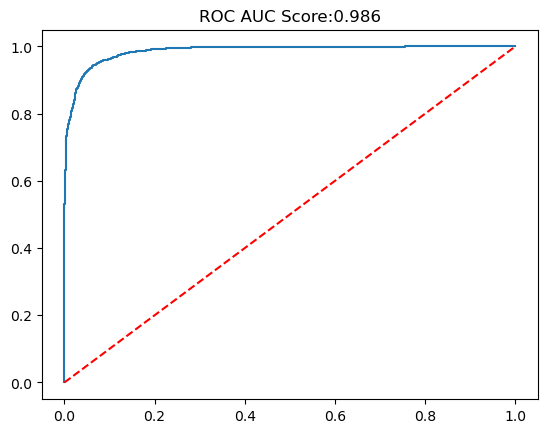

Score Card


,Model,Accuracy,Precision,Recall,F1 Score,Cohen Kappa
0,LogisticRegression(),0.948833,0.888889,0.894551,0.891711,0.858214


In [51]:
# Logistic Regression
model_validation(LogisticRegression(),xtrain_c,ytrain_c,xtest_c,ytest_c)

Classification Report
               precision    recall  f1-score   support

           0       0.93      0.93      0.93      4587
           1       0.78      0.77      0.77      1413

    accuracy                           0.89      6000
   macro avg       0.85      0.85      0.85      6000
weighted avg       0.89      0.89      0.89      6000

ROC Curve


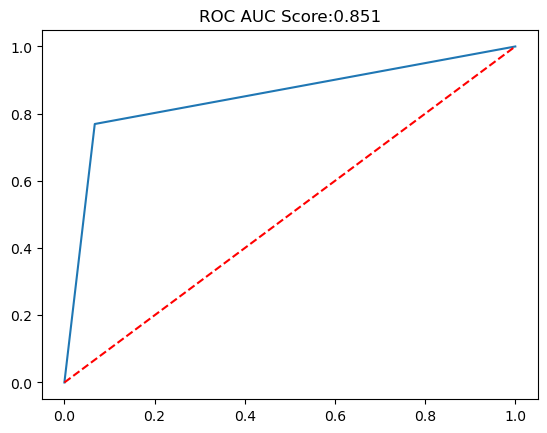

Score Card


,Model,Accuracy,Precision,Recall,F1 Score,Cohen Kappa
0,LogisticRegression(),0.948833,0.888889,0.894551,0.891711,0.858214
1,DecisionTreeClassifier(),0.894167,0.778653,0.769285,0.773941,0.704855


In [52]:
# Decision Tree classifier
model_validation(DecisionTreeClassifier(),xtrain_c,ytrain_c,xtest_c,ytest_c)

Classification Report
               precision    recall  f1-score   support

           0       0.94      0.96      0.95      4587
           1       0.87      0.80      0.83      1413

    accuracy                           0.93      6000
   macro avg       0.91      0.88      0.89      6000
weighted avg       0.92      0.93      0.92      6000

ROC Curve


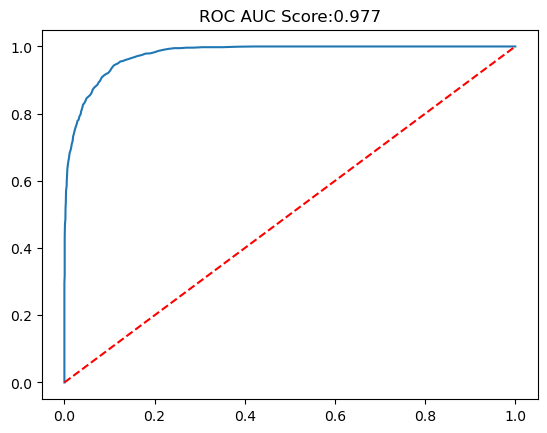

Score Card


,Model,Accuracy,Precision,Recall,F1 Score,Cohen Kappa
0,LogisticRegression(),0.948833,0.888889,0.894551,0.891711,0.858214
1,DecisionTreeClassifier(),0.894167,0.778653,0.769285,0.773941,0.704855
2,RandomForestClassifier(),0.925000,0.872390,0.798301,0.833703,0.785407


In [53]:
# Random Forest Classifier
model_validation(RandomForestClassifier(),xtrain_c,ytrain_c,xtest_c,ytest_c)

Classification Report
               precision    recall  f1-score   support

           0       0.96      0.97      0.97      4587
           1       0.91      0.87      0.89      1413

    accuracy                           0.95      6000
   macro avg       0.93      0.92      0.93      6000
weighted avg       0.95      0.95      0.95      6000

ROC Curve


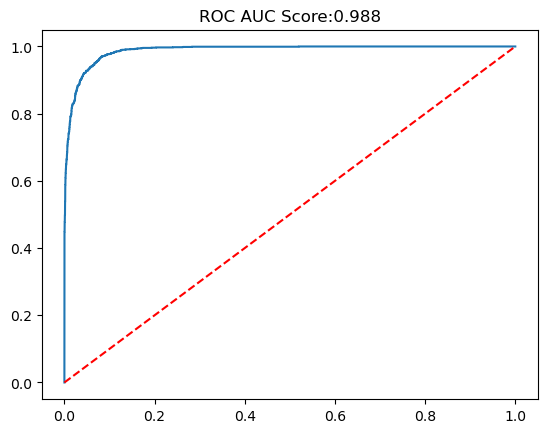

Score Card


,Model,Accuracy,Precision,Recall,F1 Score,Cohen Kappa
0,LogisticRegression(),0.948833,0.888889,0.894551,0.891711,0.858214
1,DecisionTreeClassifier(),0.894167,0.778653,0.769285,0.773941,0.704855
2,RandomForestClassifier(),0.925000,0.872390,0.798301,0.833703,0.785407
3,AdaBoostClassifier(),0.949167,0.906755,0.874027,0.890090,0.857042


In [54]:
# ADA Booster Classifier
model_validation(AdaBoostClassifier(),xtrain_c,ytrain_c,xtest_c,ytest_c)

Classification Report
               precision    recall  f1-score   support

           0       0.96      0.97      0.96      4587
           1       0.90      0.85      0.88      1413

    accuracy                           0.94      6000
   macro avg       0.93      0.91      0.92      6000
weighted avg       0.94      0.94      0.94      6000

ROC Curve


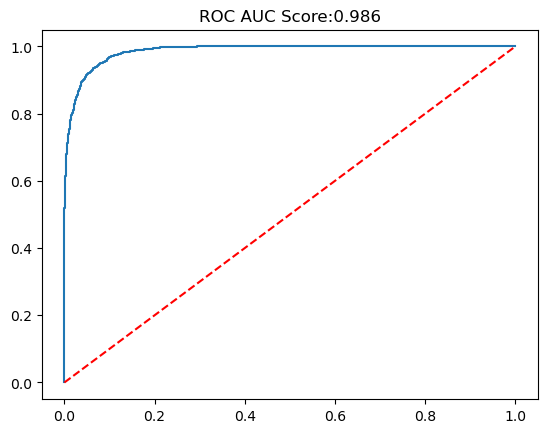

Score Card


,Model,Accuracy,Precision,Recall,F1 Score,Cohen Kappa
0,LogisticRegression(),0.948833,0.888889,0.894551,0.891711,0.858214
1,DecisionTreeClassifier(),0.894167,0.778653,0.769285,0.773941,0.704855
2,RandomForestClassifier(),0.925000,0.872390,0.798301,0.833703,0.785407
3,AdaBoostClassifier(),0.949167,0.906755,0.874027,0.890090,0.857042
4,GradientBoostingClassifier(),0.944000,0.903976,0.852795,0.877640,0.841372


In [55]:
# Gradient Boosting Classifier
model_validation(GradientBoostingClassifier(),xtrain_c,ytrain_c,xtest_c,ytest_c)

Classification Report
               precision    recall  f1-score   support

           0       0.97      0.97      0.97      4587
           1       0.91      0.90      0.90      1413

    accuracy                           0.95      6000
   macro avg       0.94      0.93      0.94      6000
weighted avg       0.95      0.95      0.95      6000

ROC Curve


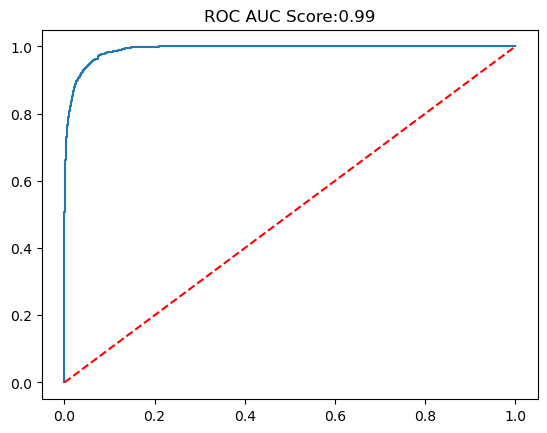

Score Card


,Model,Accuracy,Precision,Recall,F1 Score,Cohen Kappa
0,LogisticRegression(),0.948833,0.888889,0.894551,0.891711,0.858214
1,DecisionTreeClassifier(),0.894167,0.778653,0.769285,0.773941,0.704855
2,RandomForestClassifier(),0.925000,0.872390,0.798301,0.833703,0.785407
3,AdaBoostClassifier(),0.949167,0.906755,0.874027,0.890090,0.857042
4,GradientBoostingClassifier(),0.944000,0.903976,0.852795,0.877640,0.841372
5,"XGBClassifier(base_score=None, booster=None, c...",0.954667,0.908961,0.897381,0.903134,0.873545


In [56]:
#XGB Classifier
model_validation(XGBClassifier(),xtrain_c,ytrain_c,xtest_c,ytest_c)

In [57]:
#Final Model
#Since, XGB clssifier model gave better metrics than other models, we'll be tuning it for final prediction.
params = {
    'n_estimators': [100, 120, 150, 180, 210],
    'learning_rate': [0.025, 0.05, 0.075, 0.08, 0.10],
    'max_depth': [2,4,6,8,10]
}

In [58]:
gscv = GridSearchCV(estimator=XGBClassifier(random_state=2),param_grid=params,scoring='f1',verbose=1)
gscv.fit(xtrain_c,ytrain_c)

Fitting 5 folds for each of 125 candidates, totalling 625 fits


GridSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_b...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=2, ...),
             param_grid={'learning_rate': [0.025, 0.05, 0.075, 0.08, 0.1],
                         'max_depth': [2, 4, 6, 8, 10],
                         'n_estimators': [100, 120, 150, 180, 210]},
             scoring='f1', verbose=1)

In [59]:
gscv.best_params_

{'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 180}

Classification Report
               precision    recall  f1-score   support

           0       0.97      0.97      0.97      4587
           1       0.91      0.90      0.91      1413

    accuracy                           0.96      6000
   macro avg       0.94      0.94      0.94      6000
weighted avg       0.96      0.96      0.96      6000

ROC Curve


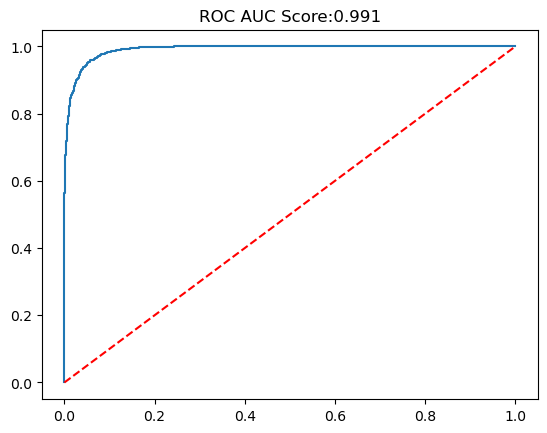

Score Card


,Model,Accuracy,Precision,Recall,F1 Score,Cohen Kappa
0,LogisticRegression(),0.948833,0.888889,0.894551,0.891711,0.858214
1,DecisionTreeClassifier(),0.894167,0.778653,0.769285,0.773941,0.704855
2,RandomForestClassifier(),0.925000,0.872390,0.798301,0.833703,0.785407
3,AdaBoostClassifier(),0.949167,0.906755,0.874027,0.890090,0.857042
4,GradientBoostingClassifier(),0.944000,0.903976,0.852795,0.877640,0.841372
5,"XGBClassifier(base_score=None, booster=None, c...",0.954667,0.908961,0.897381,0.903134,0.873545
6,"XGBClassifier(base_score=None, booster=None, c...",0.956500,0.913793,0.900212,0.906952,0.878569


In [60]:
model_validation(XGBClassifier(**gscv.best_params_),xtrain_c,ytrain_c,xtest_c,ytest_c)

In [61]:
final_model = XGBClassifier(**gscv.best_params_, random_state=2)

final_model.fit(xtrain_c,ytrain_c)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=180, n_jobs=None,
              num_parallel_tree=None, random_state=2, ...)

In [62]:
feat_imp= final_model.feature_importances_

fi_tbl = pd.DataFrame({'Column':xtrain_c.columns,'Feature importance':feat_imp})
fi_tbl.sort_values(by='Feature importance', ascending=False)

,Column,Feature importance
32,TotalDebtToIncomeRatio,0.245313
25,MonthlyIncome,0.104017
30,InterestRate,0.058119
18,PreviousLoanDefaults,0.054562
7,LoanDuration,0.051468
16,BankruptcyHistory,0.048706
28,NetWorth,0.048607
4,EducationLevel,0.042253
20,LengthOfCreditHistory,0.039822
23,TotalAssets,0.035607


In [63]:
final_model.predict_proba([[0.500412, 0.952395, -0.810209, 2.000000, 5.000000, 0.850507, 0.035302, -1.900200, 0.000000, 0.180322, 1.000000, 1.750540, 1.120532, 1.950420, 1.025342, 2.800012, 0.000000, 4.000000, 0.000000, -1.800450, 0.300512, 0.350409, 1.150250, 0.610350, 0.500450, 0.550132, 0.105212, -0.001500, 0.700401, -0.390250, -0.450123, 1.500345, 0.050312]
])[:,1][0]

0.80808425

In [64]:
final_model.predict_proba([[-0.300412, 0.612395, 0.810209, 1.500000, 2.000000, 0.350507, 0.075302, -1.900200, 0.000000, 0.480322, 1.000000, 1.750540, 1.120532, -1.950420, 1.025342, 2.500012, 0.000000, 2.000000, 1.000000, -1.800450, 0.300512, 0.136572, 1.150250, 0.610350, -0.500450, 0.550132, 0.105212, -0.001500, 0.700401, -0.390250, -0.450123, 1.500345, 0.950312]
])[:,1][0]

0.0026400853

In [65]:
#From the above 2 entries, we can see that the first applicant has 80% chances of his/her loan application being approved, 
#whereas the second applicant has 0% chances of loan approval .